In [1]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dframe=pd.read_csv("winequality-red.csv")

In [3]:
#Columns in our dataframe
dframe.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
#First 5 rows
dframe.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
dframe.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#check for null values
dframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
#Finding the distinct values of the target variable, Here it is quality
distinct_values = dframe['quality'].unique()
print(distinct_values)

[5 6 7 4 8 3]


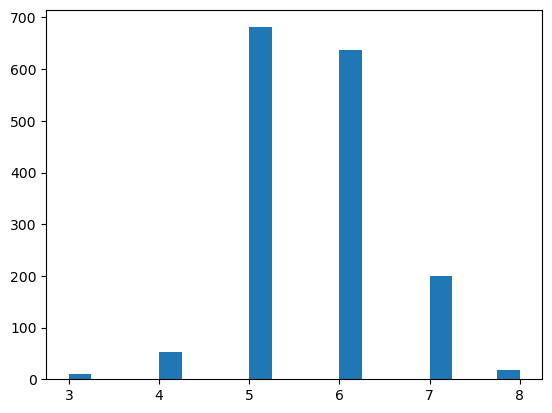

In [8]:
 #We know that the target or the dependent variable is Quality
target=dframe["quality"]
plt.hist(target,bins=20)
plt.show()

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

In [10]:
#Function for Data preprocessing-
def preprocessing_data(data,target):
    X = data.drop(columns=[target])#X:Independent variables  
    y = data[target]#y:Dependent or the target variable
    print(X)
    print(y)
    
    
    #Handling the  missing values in the dataset
    numeric_columns = X.select_dtypes(include=['number']).columns
    categorical_columns = X.select_dtypes(include=['object']).columns
    
    # Filling the missing values with mean
    num_transformer = SimpleImputer(strategy='mean') 
    # Filling the  missing categorical values with most frequent value
    cat_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
        
        ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encoding the categorical variables
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_transformer, numeric_columns),
            ('cat', cat_transformer, categorical_columns)
        ])
    
    # To split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Preprocessing pipeline
    preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
    
    # Preprocessing training and testing data
    X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train)
    X_test_preprocessed = preprocessing_pipeline.transform(X_test)
    
    return X_train_preprocessed, X_test_preprocessed, y_train, y_test
  

In [11]:
#preprocessing our dataframe
preprocessing_data(dframe,target="quality")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

(array([[ 8.7 ,  0.69,  0.31, ...,  3.48,  0.74, 11.6 ],
        [ 6.1 ,  0.21,  0.4 , ...,  3.25,  0.59, 11.9 ],
        [10.9 ,  0.39,  0.47, ...,  3.3 ,  0.75,  9.8 ],
        ...,
        [ 7.2 ,  0.62,  0.06, ...,  3.51,  0.54,  9.5 ],
        [ 7.9 ,  0.2 ,  0.35, ...,  3.32,  0.8 , 11.9 ],
        [ 5.8 ,  0.29,  0.26, ...,  3.39,  0.54, 13.5 ]]),
 array([[ 7.7  ,  0.56 ,  0.08 , ...,  3.24 ,  0.66 ,  9.6  ],
        [ 7.8  ,  0.5  ,  0.17 , ...,  3.39 ,  0.48 ,  9.5  ],
        [10.7  ,  0.67 ,  0.22 , ...,  3.28 ,  0.98 ,  9.9  ],
        ...,
        [ 8.3  ,  0.6  ,  0.25 , ...,  3.15 ,  0.53 ,  9.8  ],
        [ 8.8  ,  0.27 ,  0.39 , ...,  3.15 ,  0.69 , 11.2  ],
        [ 9.1  ,  0.765,  0.04 , ...,  3.29 ,  0.54 ,  9.7  ]]),
 493     6
 354     6
 342     6
 834     5
 705     5
        ..
 1130    6
 1294    6
 860     5
 1459    7
 1126    6
 Name: quality, Length: 1279, dtype: int64,
 803     6
 124     5
 350     6
 682     5
 1326    6
        ..
 1259    6
 1295   

In [12]:
#Creating a function to create a decision tree classifier
def create_decision_tree(X_train, y_train, max_depth=None):
    dt_classifier = DecisionTreeClassifier()
    dt_classifier.fit(X_train, y_train)
    return dt_classifier


In [13]:
#Preprocessing and splitting the dataframe into training and testing sets 
X_train, X_test, y_train, y_test = preprocessing_data(dframe,target="quality")

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00             1.9      0.076   
1               7.8             0.880         0.00             2.6      0.098   
2               7.8             0.760         0.04             2.3      0.092   
3              11.2             0.280         0.56             1.9      0.075   
4               7.4             0.700         0.00             1.9      0.076   
...             ...               ...          ...             ...        ...   
1594            6.2             0.600         0.08             2.0      0.090   
1595            5.9             0.550         0.10             2.2      0.062   
1596            6.3             0.510         0.13             2.3      0.076   
1597            5.9             0.645         0.12             2.0      0.075   
1598            6.0             0.310         0.47             3.6      0.067   

      free sulfur dioxide  

In [14]:
dt_classifier = create_decision_tree(X_train, y_train)

In [15]:
dt_classifier

DecisionTreeClassifier()

In [16]:
# Creating a function to evaluate the model
def evaluating_model(dt_classifier, X_train, y_train):
    y_pred = dt_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    con_mat = confusion_matrix(y_test, y_pred) #Confusion Matrix


    cm = confusion_matrix(y_test, y_pred, labels=dt_classifier.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=dt_classifier.classes_)
    disp.plot()
    plt.plot()
    return accuracy, report, con_mat

(0.58125,
 '              precision    recall  f1-score   support\n\n           3       0.00      0.00      0.00         1\n           4       0.00      0.00      0.00        10\n           5       0.65      0.70      0.68       130\n           6       0.57      0.54      0.55       132\n           7       0.56      0.57      0.56        42\n           8       0.00      0.00      0.00         5\n\n    accuracy                           0.58       320\n   macro avg       0.30      0.30      0.30       320\nweighted avg       0.58      0.58      0.58       320\n',
 array([[ 0,  0,  0,  1,  0,  0],
        [ 0,  0,  6,  4,  0,  0],
        [ 1,  5, 91, 30,  3,  0],
        [ 0,  2, 41, 71, 15,  3],
        [ 1,  0,  1, 14, 24,  2],
        [ 0,  0,  0,  4,  1,  0]], dtype=int64))

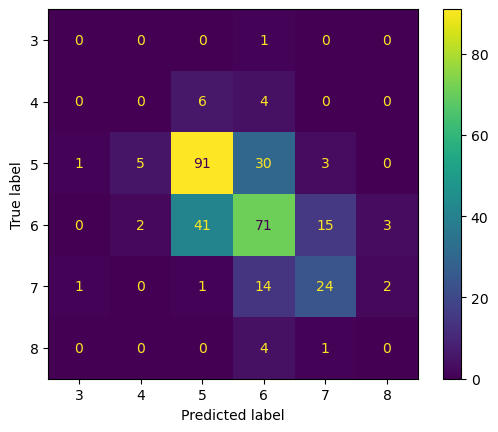

In [17]:
evaluating_model(dt_classifier, X_test, y_test)

In [18]:
#Visualizing the decision tree
def visualise_tree(dt_classifier, feature_names):
    plt.figure(figsize=(15, 10))
    class_names = [str(c) for c in dt_classifier.classes_]
    plot_tree(dt_classifier, feature_names=feature_names, class_names=class_names, filled=True)
    plt.show()

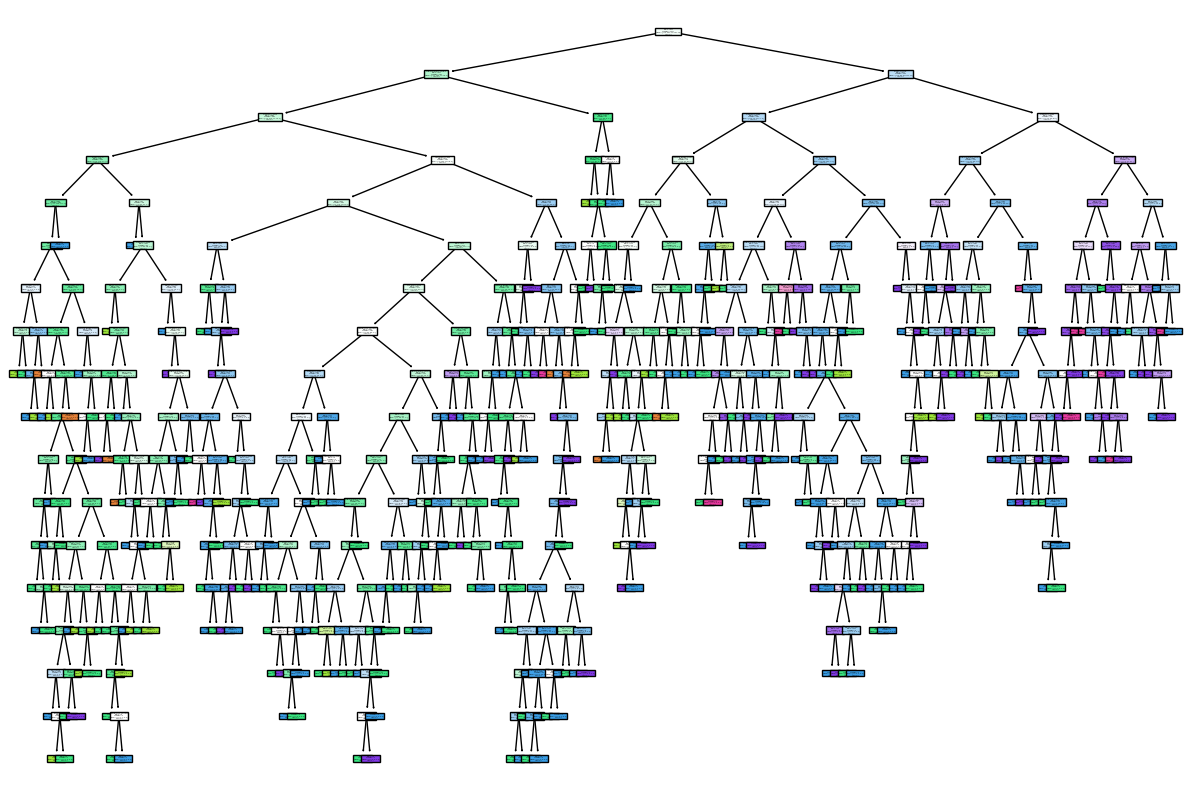

In [19]:
visualise_tree(dt_classifier,dframe.columns[:-1].tolist())